In [2]:
import pandas as pd
catalog.list()

['raw_data', 'codebook', 'intermediate_data', 'processed_data', 'parameters']

In [3]:
df = catalog.load("intermediate_data")

2023-05-02 16:45:41,442 - kedro.io.data_catalog - INFO - Loading data from 'intermediate_data' (CSVDataSet)...


In [4]:
# Find the columns with only one unique value
unique_counts = df.nunique()
only_one_unique = unique_counts[unique_counts == 1]

In [5]:
# Get the list of column names
cols_with_one_unique_value = list(only_one_unique.index)

print(cols_with_one_unique_value)

['p_state', 'p_region', 'p_geography', 'p_seifa', 'p_gender', 'p_age', 'p_age_group', 'p_birthgroup', 'p_citizen', 'p_lote', 'p_atsi', 'p_house_str', 'p_schooling', 'p_education', 'p_phone', 'wt_agehedu12', 'wt_geography', 'wt_sex']


In [6]:
df[cols_with_one_unique_value]

,p_state,p_region,p_geography,p_seifa,p_gender,p_age,p_age_group,p_birthgroup,p_citizen,p_lote,p_atsi,p_house_str,p_schooling,p_education,p_phone,wt_agehedu12,wt_geography,wt_sex
0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2050,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2051,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2052,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


In [7]:
df = df.drop(cols_with_one_unique_value, axis=1)

In [8]:
# find columns with all null values
all_null_cols = df.columns[df.isna().all()]

print(all_null_cols)

Index([], dtype='object')


In [9]:
df.head()

,SRCID,IntDate,Mode,CF_Order,Q1,Q2,Q2_Oth,Q3,Q3_Oth,Q4,...,wt_design,wt_propensit,wt_base_anu,wt_wave_anu,weight_anu,p_gender_sdc,p_age_group_sdc,p_education_sdc,p_state_sdc,StateMap
0,39,2019-04-11,2,1,2,19,NaN,16.0,NaN,3,...,4695.4258,1.150989,5384.734620,853.713782,0.091853,2.0,3.0,1.0,1.0,1.0
1,156,2019-04-09,2,2,1,12,NaN,11.0,NaN,1,...,4997.3515,1.074450,5349.881695,908.609364,0.097759,2.0,4.0,1.0,1.0,1.0
2,605,2019-04-09,2,1,2,-98,NaN,NaN,NaN,3,...,16529.8031,1.074450,17695.871707,32062.736887,3.449705,2.0,3.0,3.0,1.0,1.0
3,41,2019-04-18,2,1,2,16,NaN,5.0,NaN,3,...,6108.6230,1.150989,7005.395282,5064.031682,0.544851,2.0,4.0,2.0,1.0,1.0
4,1295,2019-04-18,1,1,4,29,NaN,16.0,NaN,5,...,4100.6080,1.150989,4702.594994,8231.010107,0.885594,1.0,2.0,2.0,1.0,1.0


In [10]:
# find columns with null values
null_cols = df.columns[df.isna().any()]

print(null_cols)

Index(['Q2_Oth', 'Q3', 'Q3_Oth', 'Q4_Oth', 'Q14', 'Q15_Order', 'Q15a', 'Q15b',
       'Q15c', 'Q15d', 'Q15e', 'Q15f', 'Q15g', 'Q15h', 'Q15i', 'R2', 'R3',
       'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14',
       'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22', 'R23', 'R24',
       'R25', 'R26', 'R27', 'R28', 'R29', 'R30', 'R31', 'S2', 'S3', 'S4', 'S5',
       'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16',
       'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26',
       'S27', 'S28', 'S29', 'S30', 'S31', 'Q23', 'Q24', 'Q25', 'p_gender_sdc',
       'p_age_group_sdc', 'p_education_sdc', 'p_state_sdc', 'StateMap'],
      dtype='object')


In [11]:
df[null_cols].isna().mean().describe()

count    83.000000
mean      0.739298
std       0.296217
min       0.002921
25%       0.535054
50%       0.868549
75%       0.967137
max       0.996592
dtype: float64

<Axes: xlabel='Proportion of null values in the attribute', ylabel='Frequency'>

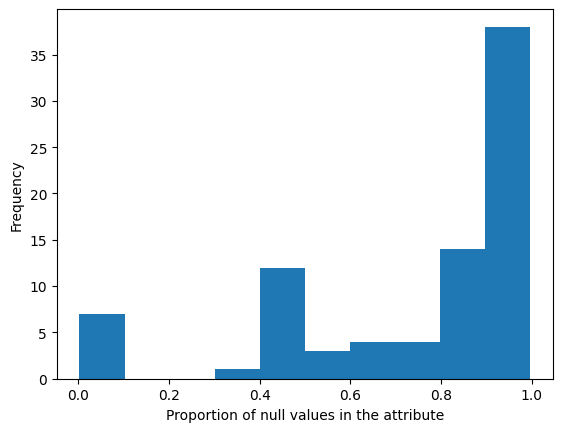

In [12]:
df[null_cols].isna().mean().plot(kind='hist' ,xlabel='Proportion of null values in the attribute')

<Axes: xlabel='Proportion of null values in the attribute', ylabel='Frequency'>

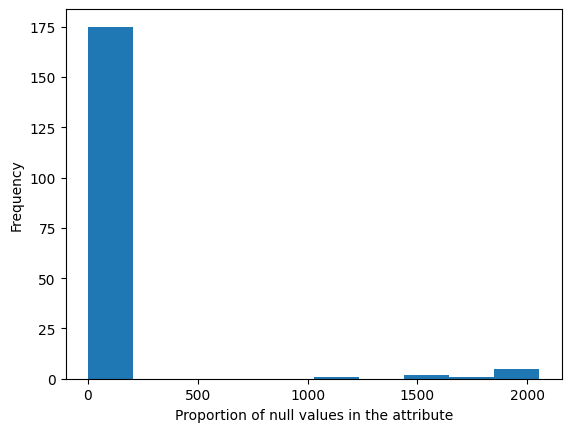

In [13]:
df.nunique().plot(kind='hist' ,xlabel='Proportion of null values in the attribute')

In [14]:
df.nunique().describe()

count     184.000000
mean       94.086957
std       389.915226
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max      2054.000000
dtype: float64

In [15]:
boolean_cols = df.columns[df.nunique() == 2]

In [16]:
df[boolean_cols]

,Mode,CF_Order,DUM1,Q10_Order,Q12_Order,SECTION_DUM,Q13_1,Q13_2,Q13_3,Q13_4,...,S25,S27,S28,S29,S30,S31,Q25,wt_internet,wt_volunteer,p_gender_sdc
0,2,1,2,"_1,_2,_98,_99","a,b,c",1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1,2.0
1,2,2,2,"_1,_2,_98,_99","c,b,a",1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1,2.0
2,2,1,1,"_2,_1,_98,_99","a,b,c",2,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2.0
3,2,1,2,"_1,_2,_98,_99","a,b,c",1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2.0
4,1,1,2,"_2,_1,_98,_99","a,b,c",2,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2,1,1,"_1,_2,_98,_99","a,b,c",2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1,2.0
2050,2,1,2,"_1,_2,_98,_99","a,b,c",1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2.0
2051,2,2,1,"_1,_2,_98,_99","c,b,a",2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2,1.0
2052,2,1,2,"_2,_1,_98,_99","a,b,c",2,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,2,1.0


In [17]:
# Redundant columns
redundant_cols = ['IntDate',
                  'Mode',
                  'CF_Order',
                  'DUM1',
                  'DUM2',
                  'Q5_Order',
                  'Q7_Order',
                  'Q9_Order',
                  'Q10_Order',
                  'Q11_Order',
                  'Q12_Order',
                  'SECTION_DUM',
                  'Q15_Order',
                  'Q16_Order',
                  'Q17_Order',
                  'wt_internet',
                'wt_tel',
                'wt_design',
                'wt_volunteer',
                'wt_propensit',
                'wt_base_anu',
                'wt_wave_anu',
                'weight_anu',]


df = df.drop(redundant_cols, axis=1)